In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data-salary.txt')

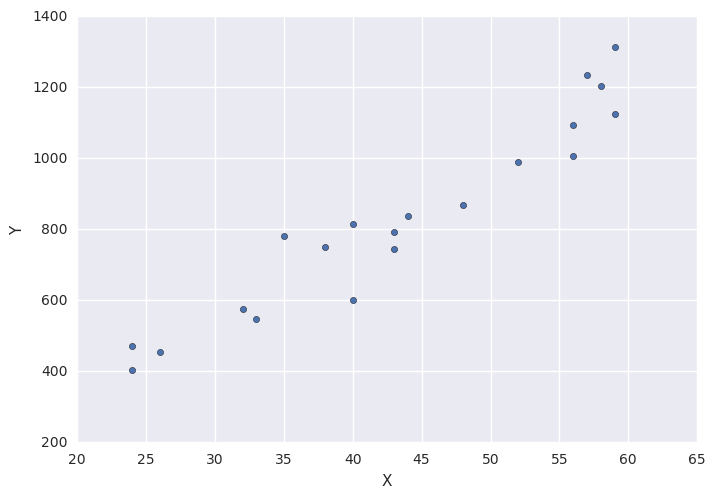

In [3]:
df.plot.scatter('X', 'Y')

(23, 60)

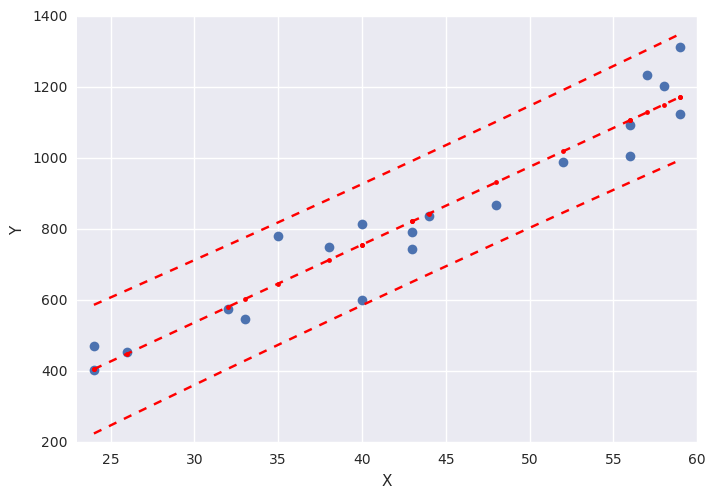

In [4]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt

x = df['X']
y = df['Y']
model = sm.OLS(y, sm.add_constant(x))
res = model.fit()
res.summary()
prstd, iv_l, iv_u = wls_prediction_std(res, alpha=0.05)
plt.plot(x, y, 'o')
plt.plot(x, res.fittedvalues, 'r--.')
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(23,60)

In [6]:
import pystan
import warnings

data = {
    'X': df['X'],
    'Y': df['Y'],
    'N': df['X'].shape[0],
}
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fit = pystan.stan(file='./model4-5.stan', data=data)

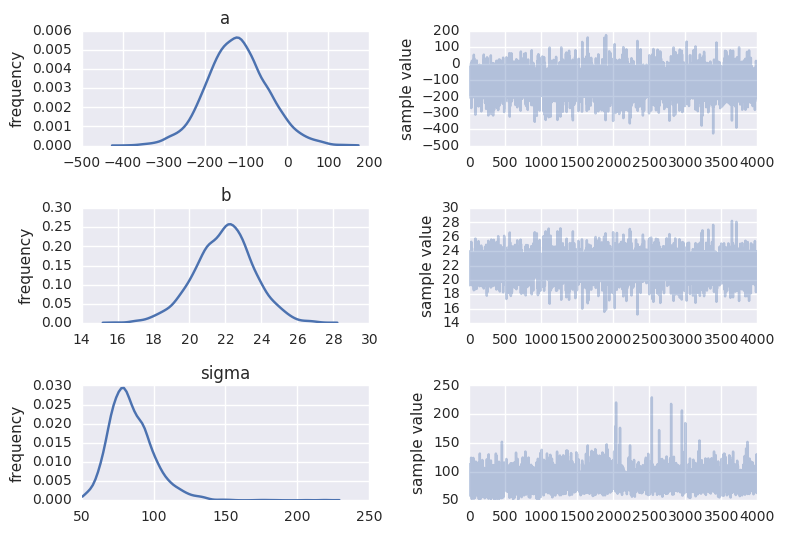

In [7]:
fit.plot()
plt.tight_layout()